# Music Genre Classification 
### by @fcacharelli and @mdtc

In [1]:
#install Speech lib

#import pip

#package_names=['python_speech_features'] #packages to install
#pip.main(['install'] + package_names + ['--upgrade']) # --upgrade to install or update existing packages

#pip install python_speech_features #in case of not having it installed 

## 1. Import Libraries

In [1]:
# Import libraries 

from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load DataSet

In [5]:
###   READ CSV FILES WITH DATA   ####

features = pd.read_csv("features.csv")
genres = pd.read_csv("genres.csv")

# Genres dictionary
genresDic = {
    1: "Blues",
    2: "Classical",
    3: "Country",
    4: "Disco",
    5: "Hip Hop",
    6: "Jazz",
    7: "Metal",
    8: "Pop",
    9: "Reggae",
    10: "Rock"
}

In [6]:
# Prepare Dataset

#directory = os.path.dirname(os.path.realpath("MLMusicGenre")) + "\\data"
#f= open("genres.dat" ,'wb')
#i=0
#for folder in os.listdir(directory):
#    i+=1
#    if i==11 :
#        break   
#    for file in os.listdir(directory+"\\"+folder):  
#        (rate,sig) = wav.read(directory+"\\"+folder+"\\"+file)
#        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
#        covariance = np.cov(np.matrix.transpose(mfcc_feat))
#        mean_matrix = mfcc_feat.mean(0)
#        feature = (mean_matrix , covariance , i)
#        pickle.dump(feature , f)
#f.close() 

In [7]:
# Load Dataset

#def loadDataSet(fileName):
#    with open(fileName, "rb") as f:
#        while True:
#            try:
#                dataset.append(pickle.load(f))
#            except EOFError:
#                f.close()
#                break
    
#dataset=[]
#loadDataSet("genres.dat")

In [22]:
# Convert to Pandas Data Frame

#dataset = pd.DataFrame(dataset)

In [21]:
# Target Class (genres)

#genres = dataset[2]

In [10]:
# Deploy features in Data Frame (df)

#column_names = ["F"+str(i) for i in range(0, 182)]

#df = pd.DataFrame(columns = column_names)

#for i in range(0,1000):
#    array = []
#    for j in range(0,13):
#        array.append(dataset.iloc[i][0][j])
#        for h in range(0,13):
#            array.append(dataset.iloc[i][1][j][h])
#    df=df.append(dict(zip(df.columns, array)), ignore_index=True)

In [17]:
# Save Data Frame to CSV for later use

#compression_opts = dict(method='zip',
#                        archive_name='out.csv')  
#df.to_csv('out.zip', index=False,
#          compression=compression_opts)  

#compression_opts = dict(method='zip',
#                        archive_name='out.csv')  
#genres.to_csv('out.zip', index=False,
#          compression=compression_opts)  

## 3. Standardize Scale

In [32]:
def standardize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaledData = scaler.transform(data)
    return pd.DataFrame(scaledData, columns=data.columns[:])

In [33]:
df_feat = standardize(features)
df_feat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F172,F173,F174,F175,F176,F177,F178,F179,F180,F181
0,0.270973,-0.127847,0.722965,0.656796,-0.615857,-0.148250,-0.564720,-0.408985,0.102941,-0.109106,...,-0.739966,0.135703,0.295860,-0.785628,-0.762488,-0.140165,-0.608138,0.337143,0.282861,-0.614068
1,-0.714168,0.261696,-0.482031,0.414503,-2.652460,-0.786573,-1.329539,-2.900857,0.894233,-1.019298,...,-0.052732,-1.241419,-0.489888,1.264134,0.629181,-0.137173,-0.771948,-0.214311,-0.359266,0.209481
2,0.504779,-0.073998,-0.088273,-0.207069,-0.510054,0.290802,0.203097,-0.529806,-0.146074,-0.472069,...,1.056673,-1.384661,-0.103685,-0.008762,-0.756548,-0.132411,0.009954,0.234618,-2.015009,-0.010838
3,-0.738413,0.069474,-0.486758,0.761254,0.044534,-1.514468,-0.471734,-1.034673,-0.913166,-0.572799,...,-0.186965,-1.606036,-0.541326,0.971464,0.204211,-0.234535,-0.432736,-0.286641,-1.157078,-0.452965
4,-0.195277,0.089357,-1.187554,-0.320837,1.874467,-1.243936,1.796846,1.802900,1.151487,-1.641215,...,-1.185515,-1.206998,0.875194,0.990349,-0.268946,-1.543012,0.996920,0.545979,-1.017532,0.573965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.048603,-0.177711,0.064313,0.556490,-0.169722,0.229966,0.182351,-0.164457,-0.318256,-0.273025,...,-0.164699,-0.726277,-0.534927,-0.412745,-0.260562,-0.554906,-0.996470,0.035648,1.048687,0.212329
996,0.009827,-0.103922,-0.096967,0.479393,-0.192720,0.123183,-0.203838,-0.300958,-0.983380,-0.276451,...,-0.124281,-0.113861,0.070178,0.109582,0.075008,0.083156,0.068300,0.407974,-0.608246,-1.241892
997,0.173850,-0.195034,0.139803,0.476668,-0.313193,0.437053,0.277001,0.349994,0.383720,-0.197373,...,1.389437,-0.237918,0.699850,-0.198866,-0.321658,0.477405,-0.747616,-0.160213,-0.265182,-0.410179
998,-0.849552,0.335393,-0.648573,-1.396481,-1.082275,1.561251,2.224351,1.056659,0.521143,0.963748,...,0.400214,-0.059095,-0.031555,-0.103718,0.341030,0.431600,0.262041,-0.135034,-0.148325,-0.381238


## 4.  Split data

In [34]:
# Use train_test_split to split randomly, having 30% of the data for testing.

X = df_feat
y = genres

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 5. Apply KNN Model

In [35]:
# Instance of the classifier with k=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())
pred = knn.predict(X_test)

## 6. Evaluate

In [38]:
# Confusion Matrix and Classification Report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0  2  1  1  0  0  0  0  3]
 [ 0 36  0  1  0  2  0  0  1  0]
 [ 1  1 12  5  0  1  0  3  0  5]
 [ 1  0  0 12  0  1  6  1  0  8]
 [ 1  0  2  1 17  0  2  5  0  2]
 [ 1  2  0  1  0 19  1  0  0  0]
 [ 1  1  0  1  0  0 25  0  0  4]
 [ 0  0  2  0  0  0  0 19  2  3]
 [ 2  0  2  7  5  0  0  1 19  1]
 [ 1  2  1  4  2  1  2  2  0 15]]
              precision    recall  f1-score   support

           1       0.68      0.71      0.69        24
           2       0.86      0.90      0.88        40
           3       0.57      0.43      0.49        28
           4       0.36      0.41      0.39        29
           5       0.68      0.57      0.62        30
           6       0.79      0.79      0.79        24
           7       0.69      0.78      0.74        32
           8       0.61      0.73      0.67        26
           9       0.86      0.51      0.64        37
          10       0.37      0.50      0.42        30

    accuracy                           0.64       300
   macro avg       

##  7. Optimize

In [29]:
# Iterate the model for different k values and calculate Error Rates 
error_rate = []

for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test.values.ravel())) # Mean of boolean array, 1: mistake, 0: right

Text(0, 0.5, 'Error Rate')

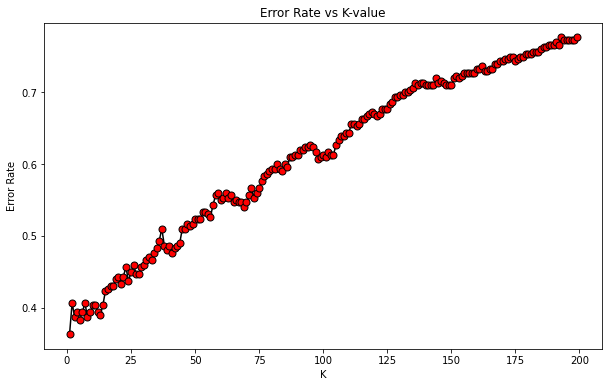

In [30]:
# Plot error rates to optimize k value

plt.figure(figsize=(10,6))
plt.plot(range(1,200), error_rate, color="black", linestyle="-", marker="o", markerfacecolor="red", markersize=7)
plt.title("Error Rate vs K-value")
plt.xlabel("K")
plt.ylabel("Error Rate")

## 8. Choose K-value
We will use k=33

In [39]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[ 6  0  5  0  1  0 10  0  0  2]
 [ 0 29  2  0  0  3  2  0  0  4]
 [ 0  1  9  6  0  0  5  1  0  6]
 [ 0  0  2  9  0  0 14  0  0  4]
 [ 0  0  0  7 12  0  7  3  0  1]
 [ 0  1  2  1  0 13  6  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  1  2  0  0  1 22  0  0]
 [ 0  0  2 15 12  1  1  0  5  1]
 [ 0  0  1  6  1  0 15  1  0  6]]


              precision    recall  f1-score   support

           1       1.00      0.25      0.40        24
           2       0.94      0.72      0.82        40
           3       0.38      0.32      0.35        28
           4       0.20      0.31      0.24        29
           5       0.46      0.40      0.43        30
           6       0.76      0.54      0.63        24
           7       0.34      1.00      0.51        32
           8       0.81      0.85      0.83        26
           9       1.00      0.14      0.24        37
          10       0.24      0.20      0.22        30

    accuracy                           0.48       300
   macro avg     

## 9. Test Model

In [63]:
# Load Song, add it to the data and standardize it.

def loadSong(file, data):
    (rate,sig)=wav.read(file)
    mfcc_feat=mfcc(sig,rate,nfft=int(rate/31.25),winlen=0.020,appendEnergy=False)
    covariance = np.cov(np.matrix.transpose(mfcc_feat))
    mean_matrix = mfcc_feat.mean(0)
    feature=(mean_matrix,covariance,0)
    
    array = []
    for j in range(0,13):
        array.append(feature[0][j])
        for h in range(0,13):
            array.append(feature[1][j][h])
    return standardize(data.append(dict(zip(data.columns, array)), ignore_index=True))

In [83]:
# Test

df = loadSong("bob marley.wav", features)

In [84]:
# Use all data to train and only the last row to test (last row is the testing song features)

X_train = df.iloc[:-1]
y_train = genres
X_test = df.iloc[-1:]

In [85]:
# Try for different k values

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred = knn.predict(X_test) #Transpose
    print(genresDic[pred[0]])

Pop
Country
Country
Country
Country
Country
Country
Country
Country
Country
Country
Country
Country
Country
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Rock
Pop
Pop
Pop
Pop
Pop
Pop
